
 
 # <center> Udacity Machine Learning Capstone Project: MLB Wins Prediction </center>
 ## <center> Data Collection and Data Wrangling </center>


<center> <img src="mlb_logo.jpg" align="center" alt="Copyright Major League Baseball" height="320" width="320" /></center> 



### <center><b>Overview</b></center>

This section of the Capstone project, MLB Wins Prediction, details the data collection and data wrangling process and procedures that resulted in generating the final dataset which was used to create the prediction model. For more information on the prediction model, please see XXXXX. 

The following items are covered in this report:


[1.0. About the Data Source](#About-the-Data-Source)<br/>
[2.0. Data Collection](#Data-Collection)<br/>
[3.0. Data Collection Process](#Data-Collection-Process)<br/>
[4.0. Data Inspection](#Data-Inspection)<br/>
[5.0. Data Wrangling](#Data-Wrangling)<br/>
[6.0. Reflections](#Reflections)<br/>


### <a id='About-the-Data-Source'><b><font color=black><center>1.0. About the Data Source: FanGraphs.com</center></font></b></a>

Fangraphs.com is website operated by FanGraphs, Inc. Fangraphs compiles historical statistical data for the entire history of Major League Baseball.  In addition, it creates and records advanced baseball metrics outside of the established statistics. FanGraphs is well established as a chronicler and compiler of baseball statistics.  It has parternership deals with ESPN and SB Nation. (Link to website: https://www.fangraphs.com/) (Wikipedia: https://en.wikipedia.org/wiki/Fangraphs)

For the purpose of this academic exercise, I purchased a year's membership to the site and was able to download the datasets needed for this project.  




### <a id='Data-Collection'><b><font color=black><center>2.0. Data Collection</center></font></b></a>
Fangraphs has an interface for members wherein you are able to download individual and team statistics covering a single season or multiple years. You are able to download and expoet the data to a csv file.

<center> <img src="FG.PNG" align="center" alt="Fangraphs.com" height="600" width="600" /></center> 

### <a id='Data-Collection-Process'><b><font color=black><center>3.0. Data Collection Process</center></font></b></a>

As stated previously, FanGraphs compiles a massive amount of statistical data from standard metrics, Earned Run Average, Home Runs, Runs Batted In, Error, Double Play to more advanced measures such as Weighted Runs Created, Ultimate Base Running, and Ultimate Zone Rating. On the site, you can generate a custom report for these statistics Fielding, Hitting, and Pitching which is exactly how I collected the data.   

<center> <img src="FG1.PNG" align="center" alt="Fangraphs.com" height="320" width="320" /></center> 

I created three custom reports for Fielding, Hitting, and Pitching statistics for the past 20 years of MLB.  I used the cutoff year of 1998 since that was the last year that MLB expanded by adding two additional teams.  Data from any other previous era would not be consistent with this current era and may affect the model. In order for the model to make accurate predicitions about Wins, it must reflect the current state of the game. 

Each custom report contains every statistic compiled by FanGraphs on the site. I then downloaded a report for every year from 1998 to 2017 for Fielding, Hitting, and Pitching.  There are 72 different statistical categories for each year of Fielding statistics, 304 different statistical categories for each year of Hitting statistics, and 320 different statistical categories for each year of Pitching statistics

The downloaded datasets may be found in the folder path: <b>00_Data Collection and Wrangling\Data\Revised Statistics</b>



### <a id='Data-Inspection'><b><font color=black><center>4.0. Data Inspection</center></font></b></a>

In order to combine the datasets into one overall dataset, I did the following:

First, I copied the datasets for fielding, hitting, and pitching into their own folders by Years.  See the directory: <b>00_Data Collection and Wrangling\Data\Revised Statistics\Years\</b> 

Next, after a cusory inspection of the datasets showed that the names for some of the statistics were the same for all three types, fielding, hitting, and pitching. For example, the strikeouts metric, "SO", is the same for both hitting and pitching, but it has two very different meanings.  In order to distinguish these features, I had to prepend an identifier.  For fielding, I prepended, "FIELD_". For pitching, I used "PITCH_", and for hitting, I used "HIT_". 

Finally, all datasets were combined into one dataset, CUMULATIVE_MLB_STATS_1998_to_2017.csv, and written out to a csv file of the same name. 




In [1]:
# Import the libraries needed
import os
import numpy as np
import pandas as pd
import pprint as pp
import capstoneutils as cp

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from glob import glob
path = os.getcwd()





## <font color='red'>PLEASE NOTE THAT THE csv files have already been created in their folders.  If you run the code below, please make sure that all of the files in the folder, <b>00_Data_Collection_and_Wrangling\Data\Revised Statistics\Years\Output</b> have been deleted.</font>

In [2]:
#The for loop that writes out the csv files. 

for i in range(1998, 2018):
    i = str(i)
    csvPath = "\\Data\\Revised Statistics\\Years\\"
    csvFiles = path + csvPath+i + r"\ " 
    print(csvFiles)
    dataFrameName = pd.DataFrame()
    dataFrameName = cp.mergeCSVs(csvFiles, i+"_MLB_STATS.csv", path + r"\Data\Revised Statistics\Years\Output\ ")


C:\Users\jkhan\Documents\udacity\MLND\Capstone Project\CAPSTONE FINAL PROJECT\00_Data_Collection_and_Wrangling\Data\Revised Statistics\Years\1998\ 
C:\Users\jkhan\Documents\udacity\MLND\Capstone Project\CAPSTONE FINAL PROJECT\00_Data_Collection_and_Wrangling\Data\Revised Statistics\Years\1999\ 
C:\Users\jkhan\Documents\udacity\MLND\Capstone Project\CAPSTONE FINAL PROJECT\00_Data_Collection_and_Wrangling\Data\Revised Statistics\Years\2000\ 
C:\Users\jkhan\Documents\udacity\MLND\Capstone Project\CAPSTONE FINAL PROJECT\00_Data_Collection_and_Wrangling\Data\Revised Statistics\Years\2001\ 
C:\Users\jkhan\Documents\udacity\MLND\Capstone Project\CAPSTONE FINAL PROJECT\00_Data_Collection_and_Wrangling\Data\Revised Statistics\Years\2002\ 
C:\Users\jkhan\Documents\udacity\MLND\Capstone Project\CAPSTONE FINAL PROJECT\00_Data_Collection_and_Wrangling\Data\Revised Statistics\Years\2003\ 
C:\Users\jkhan\Documents\udacity\MLND\Capstone Project\CAPSTONE FINAL PROJECT\00_Data_Collection_and_Wrangling\D

In [3]:
#The final combined csv file for all Fielding, Pitching, and Hitting data from 1998 to 2017
CUMULATIVE_MLB_STATS_1998_to_2017 = pd.DataFrame()
files = glob("*.csv")
dfList = [pd.read_csv(f) for f in files]
CUMULATIVE_MLB_STATS_1998_to_2017_01 = pd.concat(dfList)
CUMULATIVE_MLB_STATS_1998_to_2017_01.reset_index(inplace=True,drop=True)
CUMULATIVE_MLB_STATS_1998_to_2017_01.to_csv("CUMULATIVE_MLB_STATS_1998_to_2017_01.csv")

### <a id='Data-Wrangling'><b><font color=black><center>5.0. Data Wrangling</center></font></b></a>

The shape of the combined datasets shows 600 observations and 697 features.  The head function shows an additional column, "Unnamed". When looking at the colum values, I noticed that there were duplicates as some of the column headings have a ".1" suffix which indicates a duplicate.

In [4]:
CUMULATIVE_MLB_STATS_1998_to_2017_01.shape

(600, 697)

In [5]:
CUMULATIVE_MLB_STATS_1998_to_2017_01.head(5)

,Unnamed: 0,Team,W,L,PITCH_ERA,PITCH_G,PITCH_GS,PITCH_CG,PITCH_ShO,PITCH_SV,...,FIELD_1-10%,FIELD_# 1-10%,FIELD_10-40%,FIELD_# 10-40%,FIELD_40-60%,FIELD_# 40-60%,FIELD_60-90%,FIELD_# 60-90%,FIELD_90-100%,FIELD_# 90-100%
0,0,Braves,106,56,3.25,516,162,24,14,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Astros,102,60,3.50,501,162,12,7,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Padres,98,64,3.63,531,162,14,5,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Mets,88,74,3.77,561,162,9,3,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Dodgers,83,79,3.81,504,162,16,6,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
CUMULATIVE_MLB_STATS_1998_to_2017_01.columns.values

array(['Unnamed: 0', 'Team', 'W', 'L', 'PITCH_ERA', 'PITCH_G', 'PITCH_GS',
       'PITCH_CG', 'PITCH_ShO', 'PITCH_SV', 'PITCH_HLD', 'PITCH_BS',
       'PITCH_IP', 'PITCH_TBF', 'PITCH_H', 'PITCH_R', 'PITCH_ER',
       'PITCH_HR', 'PITCH_BB', 'PITCH_IBB', 'PITCH_HBP', 'PITCH_WP',
       'PITCH_BK', 'PITCH_SO', 'PITCH_Age', 'PITCH_W.1', 'PITCH_L.1',
       'PITCH_ERA.1', 'PITCH_G.1', 'PITCH_GS.1', 'PITCH_CG.1',
       'PITCH_ShO.1', 'PITCH_SV.1', 'PITCH_BS.1', 'PITCH_IP.1',
       'PITCH_TBF.1', 'PITCH_H.1', 'PITCH_R.1', 'PITCH_ER.1',
       'PITCH_HR.1', 'PITCH_BB.1', 'PITCH_IBB.1', 'PITCH_HBP.1',
       'PITCH_WP.1', 'PITCH_BK.1', 'PITCH_SO.1', 'PITCH_GB', 'PITCH_FB',
       'PITCH_LD', 'PITCH_IFFB', 'PITCH_Balls', 'PITCH_Strikes',
       'PITCH_Pitches', 'PITCH_RS', 'PITCH_IFH', 'PITCH_BU', 'PITCH_BUH',
       'PITCH_K/9', 'PITCH_BB/9', 'PITCH_K/BB', 'PITCH_H/9', 'PITCH_HR/9',
       'PITCH_AVG', 'PITCH_WHIP', 'PITCH_BABIP', 'PITCH_LOB%',
       'PITCH_FIP', 'PITCH_GB/FB', 'PITCH_LD%',

The utilitiy function, removeDuplicateFeatures, removes all of the duplicate column names from the dataframe.

In [7]:
dupe_features_removed = list()       
cp.removeDuplicateFeatures(CUMULATIVE_MLB_STATS_1998_to_2017_01,dupe_features_removed)
pp.pprint(dupe_features_removed)




['PITCH_W.1',
 'PITCH_L.1',
 'PITCH_ERA.1',
 'PITCH_G.1',
 'PITCH_GS.1',
 'PITCH_CG.1',
 'PITCH_ShO.1',
 'PITCH_SV.1',
 'PITCH_BS.1',
 'PITCH_IP.1',
 'PITCH_TBF.1',
 'PITCH_H.1',
 'PITCH_R.1',
 'PITCH_ER.1',
 'PITCH_HR.1',
 'PITCH_BB.1',
 'PITCH_IBB.1',
 'PITCH_HBP.1',
 'PITCH_WP.1',
 'PITCH_BK.1',
 'PITCH_SO.1',
 'PITCH_FB%.1',
 'PITCH_HLD.1',
 'Team.1',
 'OFF_G.1',
 'OFF_PA.1',
 'OFF_HR.1',
 'OFF_R.1',
 'OFF_RBI.1',
 'OFF_SB.1',
 'OFF_AVG.1',
 'OFF_BB%.1',
 'OFF_K%.1',
 'OFF_OBP.1',
 'OFF_SLG.1',
 'OFF_ISO.1',
 'OFF_BABIP.1',
 'OFF_wOBA.1',
 'OFF_WAR.1',
 'OFF_wRC+.1',
 'OFF_FB%.1',
 'OFF_BsR.1',
 'OFF_Def.1',
 'OFF_Off.1',
 'FIELD_G.1',
 'FIELD_GS.1',
 'FIELD_Inn.1',
 'FIELD_PO.1',
 'FIELD_A.1',
 'FIELD_E.1',
 'FIELD_FE.1',
 'FIELD_TE.1',
 'FIELD_DP.1',
 'FIELD_DPS.1',
 'FIELD_DPT.1',
 'FIELD_DPF.1',
 'FIELD_Scp.1',
 'FIELD_SB.1',
 'FIELD_CS.1',
 'FIELD_PB.1',
 'FIELD_WP.1',
 'FIELD_FP.1',
 'FIELD_TZ.1']


In [8]:
#There are now 634 features in the dataset.

CUMULATIVE_MLB_STATS_1998_to_2017_01.shape

(600, 634)

Even after duplicates are removed, there are 634 features in this dataset.  This is due to the fact that Fangraphs maintains a huge library of metrics for every team and player.  Some of these features, e.g. Wins Above Replacement ("WAR") are more of a measure for an individual player, not a team. A complete glossary of each statistic is available on the Fangraphs site at this link: https://www.fangraphs.com/library/

For this project, I chose 137 features which are more team oriented features.  The complete list that I chose is here: <b>00_Data Collection and Wrangling\Data\Selected Features</b>



In [9]:
CUMULATIVE_MLB_STATS_1998_to_2017_02 = CUMULATIVE_MLB_STATS_1998_to_2017_01[['FIELD_UZR','FIELD_DRS','FIELD_E','FIELD_DP','FIELD_rSB','FIELD_rGDP','FIELD_rARM','FIELD_rGFP','FIELD_rPM','FIELD_rPM','FIELD_BIZ','FIELD_Plays','FIELD_RZR','FIELD_OOZ','FIELD_TZL','FIELD_FSR','FIELD_ARM','FIELD_DPR','FIELD_RngR','FIELD_ErrR','FIELD_Def','FIELD_RPP','FIELD_CPP','FIELD_FE','FIELD_TE','FIELD_DPS','FIELD_DPT','FIELD_DPF','FIELD_Scp','FIELD_SB','FIELD_CS','FIELD_PB','FIELD_WP','FIELD_FP','FIELD_PO','OFF_PA','OFF_HR','OFF_R','OFF_RBI','OFF_SB','OFF_ISO','OFF_BABIP','OFF_AVG','OFF_OBP','OFF_SLG','OFF_wOBA','OFF_wRC+','OFF_H','OFF_1B','OFF_2B','OFF_3B','OFF_BB','OFF_IBB','OFF_SO','OFF_HBP','OFF_SF','OFF_GDP','OFF_CS','OFF_BB%','OFF_K%','OFF_BB/K','OFF_GB/FB','OFF_LD%','OFF_GB%','OFF_FB%','OFF_IFFB%','OFF_IFH%','OFF_BUH%','OFF_Pull%','OFF_Cent%','OFF_Oppo%','OFF_Soft%','OFF_Med%','OFF_Hard%','OFF_O-Swing%','OFF_Z-Swing%','OFF_Swing%','OFF_O-Contact%','OFF_Z-Contact%','OFF_Zone%','OFF_F-Strike%','OFF_SwStr%','OFF_HR/FB','OFF_BUH','OFF_IFH','W','L','PITCH_ERA','PITCH_CG','PITCH_ShO','PITCH_SV','PITCH_HLD','PITCH_BS','PITCH_H','PITCH_R','PITCH_ER','PITCH_HR','PITCH_BB','PITCH_IBB','PITCH_HBP','PITCH_WP','PITCH_BK','PITCH_SO','PITCH_GB','PITCH_FB','PITCH_LD','PITCH_Balls','PITCH_Strikes','PITCH_Pitches','PITCH_RS','PITCH_K/9','PITCH_BB/9','PITCH_K/BB','PITCH_H/9','PITCH_HR/9','PITCH_AVG','PITCH_WHIP','PITCH_BABIP','PITCH_LOB%','PITCH_FIP','PITCH_GB/FB','PITCH_LD%','PITCH_GB%','PITCH_FB%','PITCH_IFFB%','PITCH_HR/FB','PITCH_IFH%','PITCH_BUH%','PITCH_Starting','PITCH_Relieving','PITCH_Start-IP','PITCH_Relief-IP','PITCH_K%','PITCH_BB%','PITCH_RS/9','PITCH_Age','PITCH_xFIP','PITCH_tERA']]

In [10]:
print(CUMULATIVE_MLB_STATS_1998_to_2017_02.shape)
CUMULATIVE_MLB_STATS_1998_to_2017_02.to_csv('CUMULATIVE_MLB_STATS_1998_to_2017_02.csv')


(600, 138)


Looking at the feature, "PITCH_K%", which is a team's strikeouts percentage, I noticed that the values are in percents.  The remove percentages function removes the "%" sign and divides the number by 100. This function is applied to the entire dataframe.

In [11]:
CUMULATIVE_MLB_STATS_1998_to_2017_02.loc[0:6,"PITCH_K%"]

0    20.7 %
1    19.1 %
2    19.8 %
3    18.3 %
4    19.1 %
5    17.7 %
6    17.9 %
Name: PITCH_K%, dtype: object

The capston utility function, remove_percentages, further cleans up the data by removing the '%" sign. 

In [12]:
CUMULATIVE_MLB_STATS_1998_to_2017_03 = CUMULATIVE_MLB_STATS_1998_to_2017_02.applymap(cp.remove_percentages)
CUMULATIVE_MLB_STATS_1998_to_2017_03.shape

(600, 138)

In [13]:
CUMULATIVE_MLB_STATS_1998_to_2017_03.loc[0:6,"PITCH_K%"]

0    0.207
1    0.191
2    0.198
3    0.183
4    0.191
5    0.177
6    0.179
Name: PITCH_K%, dtype: float64

In [14]:
CUMULATIVE_MLB_STATS_1998_to_2017_03.to_csv('CUMULATIVE_MLB_STATS_1998_to_2017_03.csv')

Next, I want to remove any features that have NaN or missing values. There are 138 features in this dataset and NaN or null values may affect the model's ability to accurately predict wins. First, we need to know the percentage of missing data for each feature. The graphic below shows those features which have greater than 20% NaN values. This makes intuitive sense that the Fielding features would have the higher NaN counts since it's difficult to measure fielding statistics unless it is being observed in real time. Pitching and hitting statistics can be gleaned from the box score.

,Feature,Nan_Count_Percentage
13,FIELD_TZL,1.00
14,FIELD_FSR,0.55
20,FIELD_RPP,0.65
21,FIELD_CPP,0.65


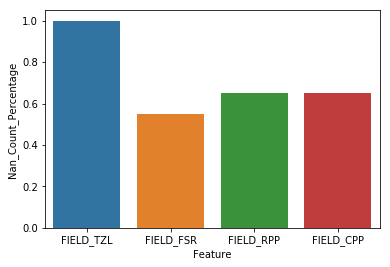

In [15]:
Nan_count = (CUMULATIVE_MLB_STATS_1998_to_2017_03.isnull().sum()/600).to_dict()
Nan_count_df = pd.DataFrame(list(Nan_count.items()), index=[i for i in range(0,137)], columns=["Feature", "Nan_Count_Percentage"])
Nan_count_df1 = Nan_count_df[Nan_count_df["Nan_Count_Percentage"] > .25]                           
ax = sns.barplot(x="Feature", y="Nan_Count_Percentage", data=Nan_count_df1)
Nan_count_df1




The next step is to remove all features where the NaN count percentage is greater than 0.  IOW, features with any NaN values will be removed entirely from the final dataset. 


In [16]:
CUMULATIVE_MLB_STATS_1998_to_2017_04 = CUMULATIVE_MLB_STATS_1998_to_2017_03.dropna(axis=1)
CUMULATIVE_MLB_STATS_1998_to_2017_04.shape


(600, 67)

In [17]:
Nan_count2 = (CUMULATIVE_MLB_STATS_1998_to_2017_04.isnull().sum()/600).to_dict()
Nan_count2


{'FIELD_CS': 0.0,
 'FIELD_DP': 0.0,
 'FIELD_E': 0.0,
 'FIELD_FP': 0.0,
 'FIELD_PB': 0.0,
 'FIELD_PO': 0.0,
 'FIELD_SB': 0.0,
 'FIELD_WP': 0.0,
 'L': 0.0,
 'OFF_1B': 0.0,
 'OFF_2B': 0.0,
 'OFF_3B': 0.0,
 'OFF_AVG': 0.0,
 'OFF_BABIP': 0.0,
 'OFF_BB': 0.0,
 'OFF_BB%': 0.0,
 'OFF_BB/K': 0.0,
 'OFF_CS': 0.0,
 'OFF_GDP': 0.0,
 'OFF_H': 0.0,
 'OFF_HBP': 0.0,
 'OFF_HR': 0.0,
 'OFF_IBB': 0.0,
 'OFF_ISO': 0.0,
 'OFF_K%': 0.0,
 'OFF_OBP': 0.0,
 'OFF_PA': 0.0,
 'OFF_R': 0.0,
 'OFF_RBI': 0.0,
 'OFF_SB': 0.0,
 'OFF_SF': 0.0,
 'OFF_SLG': 0.0,
 'OFF_SO': 0.0,
 'OFF_wOBA': 0.0,
 'OFF_wRC+': 0.0,
 'PITCH_AVG': 0.0,
 'PITCH_Age': 0.0,
 'PITCH_BABIP': 0.0,
 'PITCH_BB': 0.0,
 'PITCH_BB%': 0.0,
 'PITCH_BB/9': 0.0,
 'PITCH_BK': 0.0,
 'PITCH_CG': 0.0,
 'PITCH_ER': 0.0,
 'PITCH_ERA': 0.0,
 'PITCH_FIP': 0.0,
 'PITCH_H': 0.0,
 'PITCH_H/9': 0.0,
 'PITCH_HBP': 0.0,
 'PITCH_HR': 0.0,
 'PITCH_HR/9': 0.0,
 'PITCH_IBB': 0.0,
 'PITCH_K%': 0.0,
 'PITCH_K/9': 0.0,
 'PITCH_K/BB': 0.0,
 'PITCH_LOB%': 0.0,
 'PITCH_R': 0.0,


With all the NaN and null values removed, I wrote out the final dataset. The number of features have been reduced to 67.

In [18]:
CUMULATIVE_MLB_STATS_1998_to_2017_04.to_csv('FINAL_DATASET_MLB_1998_to_2017.csv')

### <a id='Reflections'><b><font color=black><center>6.0. Reflections</center></font></b></a>

In this section, I have described the source of the dataset, detailed the collection process, inspected the data, and performed data wrangling in order to prepare the final dataset.  I made some major choices about the data.  First, I culled the data by removing features that are more player oriented than team oriented. Next, I cleaned up data that had the '%' sign.  Finally, I removed all features that had NaN values. Some, or even all, of the choices that I made may affect the model's performance. However, given the steps laid out in this section, it should be fairly simple to reverse or add another step which will lead to a different final data set.  Additionally, I saved off the datasets after every step.  Each of these save datasets could be substituted in the next section, building the model. 